# Exploratory Data Analysis on the Stack Overflow Developer Survey 2021

Hello, and welcome. Karl Djotchuang Tamo is my name. I am a Data Science enthusiast and trainee. I work at [Fapshi Inc](https://engr.fapshi.com). 

In this notebook, we'll use Pandas (Python) to perform some Exploratory Data Analysis (EDA) on the Stack Overflow Developer Survey 2021 dataset. If you want to follow along, you can download the dataset from Kaggle for free using [this link](https://www.kaggle.com/kmaheshbabu/stack-overflow-developer-survey-results-2021).

The dataset was published on Kaggle on 01/09/2021. _"With nearly 80,000 responses from over 180 countries and dependent territories, Stack Overflow Annual Developer Survey examined all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software."_

## Section 1: Import & Setup the Dataset

In [70]:
# All imports will go here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Show graphs in the jupyter notebook, not as pop up images
%matplotlib inline 

In [2]:
data = pd.read_csv('survey_results_public.csv')

data.head(2)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN


We want to get the questions so that we can know what the responses actually mean, and see what we can do with the data.

In [3]:
question_df = pd.read_csv('survey_results_schema.csv')

question_df.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR


In [4]:
# Get the quetion and question name from schema and remove irrelevant metadata at the top

question_df = question_df[['qname', 'question']].iloc[3:, :].reset_index().drop(['index'], axis=1)

In [5]:
pd.set_option('display.max_colwidth', None)

question_df.head()

,qname,question
0,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."" <b>*</b>"
1,Employment,Which of the following best describes your current <b>employment status</b>?
2,Country,"Where do you live? <span style=""font-weight: bolder;"">*</span>"
3,US_State,<p>In which state or territory of the USA do you live? <i>This information will be kept private.</i></p>
4,UK_Country,In which part of the United Kingdom do you live? <i>This information will be kept private.</i>


In [6]:
data = data.set_index('ResponseId')

data.head()

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Independent contractor, freelancer, or self-employed",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",18 - 24 years,"Coding Bootcamp;Other online resources (ex: videos, blogs, etc)",NaN,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);School",7,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
3,"I am not primarily a developer, but I write code sometimes as part of my work","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);Online Forum",NaN,NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
5,I am a developer by profession,"Independent contractor, freelancer, or self-employed",United Kingdom of Great Britain and Northern Ireland,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [7]:
data.shape

(83439, 47)

In [8]:
data.columns

Index(['MainBranch', 'Employment', 'Country', 'US_State', 'UK_Country',
       'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode', 'YearsCodePro',
       'DevType', 'OrgSize', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

## Section 2: Analyzing Some Multiple Choice Questions

In [9]:
question_df

,qname,question
0,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."" <b>*</b>"
1,Employment,Which of the following best describes your current <b>employment status</b>?
2,Country,"Where do you live? <span style=""font-weight: bolder;"">*</span>"
3,US_State,<p>In which state or territory of the USA do you live? <i>This information will be kept private.</i></p>
4,UK_Country,In which part of the United Kingdom do you live? <i>This information will be kept private.</i>
5,S2,"<span style=""font-size:22px; font-family: arial,helvetica,sans-serif; font-weight: 700;"">Education, work, and career</span><br>\n<br>\n\n<p><span style=""font-size:16px; font-family:arial,helvetica,sans-serif;"">This section will focus on your education, work, and career.<br>\n<br>\nMost questions in this section are optional. Required questions are noted with *.</span></p>"
6,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed? *
7,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
8,LearnCode,How did you learn to code? Select all that apply.
9,YearsCode,"Including any education, how many years have you been coding in total?"


### Question 1
Let us say we want to know how many people who took the survey have a Stack Overflow Account.
We'll do this in two steps:
- Obtain the value counts for the various MCQ options
- Plot a bar chart to show the results

In [10]:
# Value Counts
account_details = data.SOAccount.value_counts()

account_details

Yes                        67813
No                         10510
Not sure/can't remember     4202
Name: SOAccount, dtype: int64

It will be nice to see this data as a percentage rather than just numbers

In [11]:
account_details = data.SOAccount.value_counts(normalize=True) * 100

account_details

Yes                        82.172675
No                         12.735535
Not sure/can't remember     5.091790
Name: SOAccount, dtype: float64

In [12]:
# Code to centralize all graphs

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

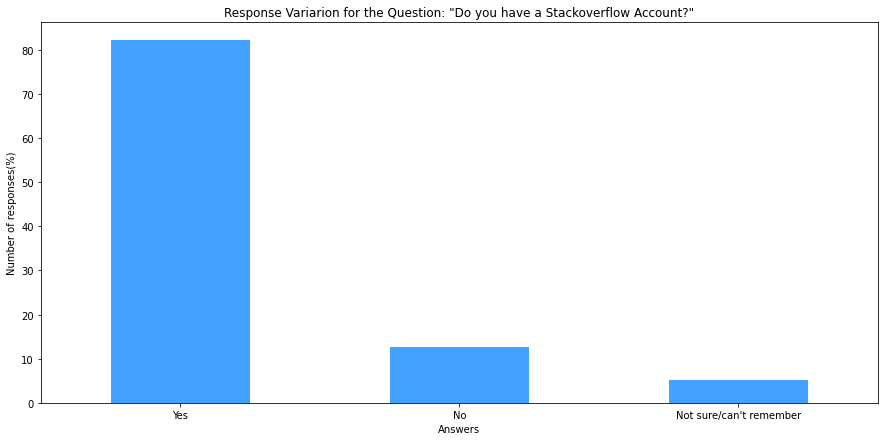

In [13]:
# Bar Chart to show the results
account_details.plot(kind="bar", figsize=(15,7), color="#43a1ff")
plt.title('Response Variarion for the Question: "Do you have a Stackoverflow Account?"')
plt.xlabel('Answers')
plt.ylabel('Number of responses(%)')
plt.xticks(rotation=0)
plt.show()

#### Conclusion
The graph show that > 80% of the respondents have a stackoverflow account, more than 10% do not have an account, while the remaining set of people were either not sure or they couldn't remember.

### Question 2
We want to evaluate the question: "Do you consider yourself a member of the Stack Overflow community?"
We will follow the same steps as in question 1.

In [14]:
community_data = data.SOComm.value_counts(normalize=True)*100

community_data

Yes, somewhat      28.649522
No, not really     25.142434
Neutral            20.753411
Yes, definitely    15.656167
No, not at all      8.057678
Not sure            1.740789
Name: SOComm, dtype: float64

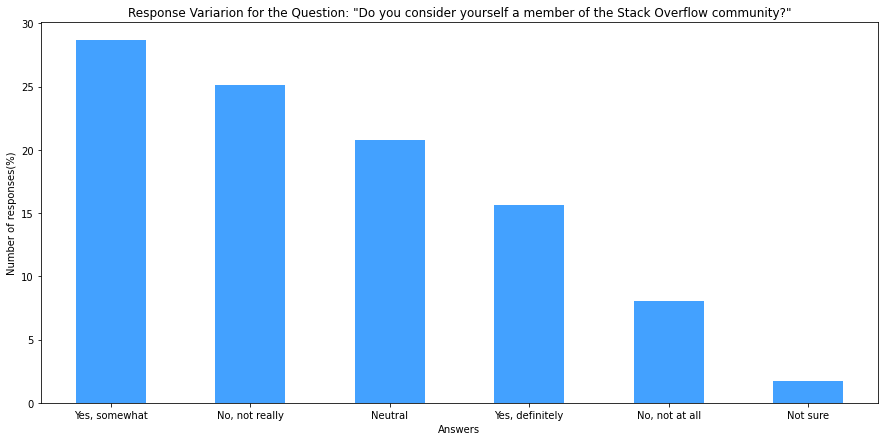

In [15]:
# Bar Chart to show the results
community_data.plot(kind="bar", figsize=(15,7), color="#43a1ff")
plt.title('Response Variarion for the Question: "Do you consider yourself a member of the Stack Overflow community?"')
plt.xlabel('Answers')
plt.ylabel('Number of responses(%)')
plt.xticks(rotation=0)
plt.show()

#### Conclusion
Based on the responses (as shown on the graph), we can infer that many of the respondents did not know what it exactly it means to be part of the community, because more than 80% of them said they had accounts, but not up to 30% of them are sure that they are part of the community.

### Question 3
We want to see the educational levels of those who took the survey

In [16]:
ed_level = data['EdLevel'].value_counts(normalize=True)*100

ed_level

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          42.534225
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       21.066814
Some college/university study without earning a degree                                12.738493
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    11.469336
Other doctoral degree (Ph.D., Ed.D., etc.)                                             3.088083
Primary/elementary school                                                              2.982220
Associate degree (A.A., A.S., etc.)                                                    2.683877
Something else                                                                         1.925992
Professional degree (JD, MD, etc.)                                                     1.510959
Name: EdLevel, dtype: float64

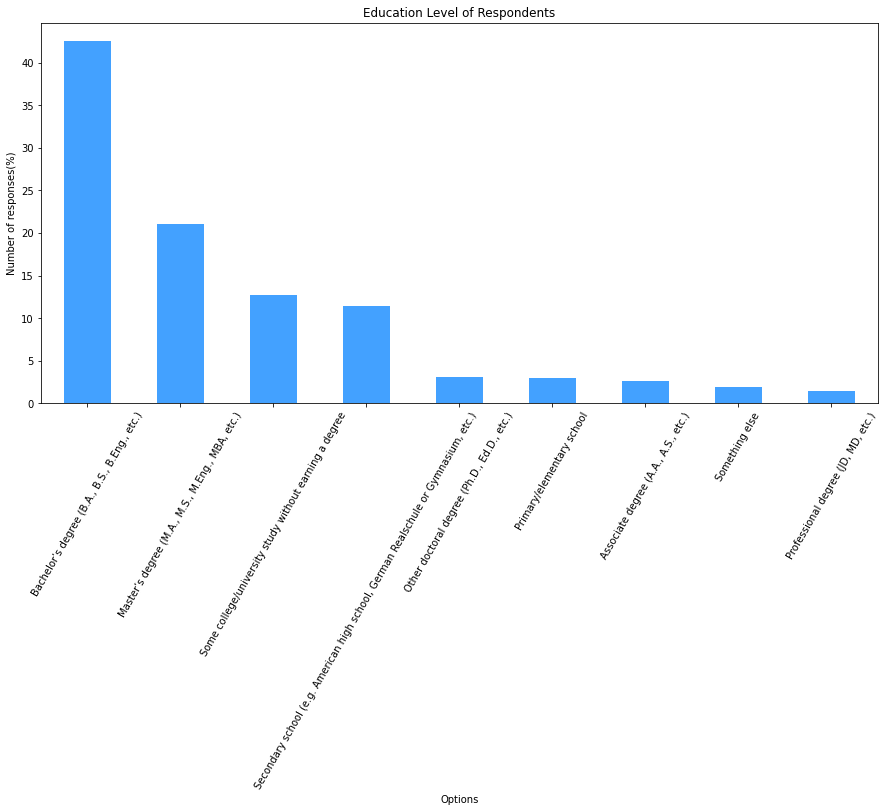

In [17]:
ed_level.plot(kind="bar", figsize=(15,7), color="#43a1ff")
plt.title('Education Level of Respondents')
plt.xlabel('Options')
plt.ylabel('Number of responses(%)')
plt.xticks(rotation=60)
plt.show()

#### Conclusion
Most of the respondents had had some level of formal university studies and qualification.

## Section 3: Analyzing Subsets of the Data
From section 2 above, we know that more than 60% of the respondents have either a Bachelor's degree or Master's degree. Let us compare this information with how people answered the question about how long they've been coding.

- We'll select all rows in the dataframe where the educational level is either Bachelor's degree or Master's degree
- We'll compare this data with the years of code to draw some inference using statistical functions such as the mean, median,...

In [18]:
# Select all rows where the educational is in the first two indices of the ed_level series
degree_holders = data[data.EdLevel.isin(ed_level.index[0:2])]

degree_holders.head()

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);School",7,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
3,"I am not primarily a developer, but I write code sometimes as part of my work","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);Online Forum",NaN,NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
5,I am a developer by profession,"Independent contractor, freelancer, or self-employed",United Kingdom of Great Britain and Northern Ireland,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
6,I am a student who is learning to code,"Student, part-time",United States of America,Georgia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);Online Courses or Certification",NaN,NaN,...,18-24 years old,Prefer not to say,No,Straight / Heterosexual,Prefer not to say,None of the above,I have a concentration and/or memory disorder (e.g. ADHD),Too long,Neither easy nor difficult,NaN


There are some values which are not numbers in this column. They are 'Less than 1 year' and 'More than 50years'. We will replace them with 1 and 50 repectively. We will also drop all NaN values.

In [72]:
#Drop all NaN values and convert all strings to float

remove_nan = degree_holders['YearsCode'].dropna()

remove_nan

ResponseId
2         7.0
5        17.0
8         4.0
9         6.0
10        7.0
         ... 
83433     5.0
83434    15.0
83435     6.0
83436     4.0
83438     5.0
Name: YearsCode, Length: 51888, dtype: float64

In [69]:
print(f'Mean: ', remove_nan.mean(),'\n', f'Median: ', remove_nan.median())

Mean:  13.169615325316066 
 Median:  10.0


What this means is that degree holders who answered the survey have averagely have about 13 years of coding experience. The median signifies the majority, so, as a normal distribution, most of the degree holders have 10 years of coding experience.

## Section 4: Analyzing More Specific Subsets
Say we want to know the ages at which Cameroonians start coding

In [95]:
cameroon_data = data[data.Country == 'Cameroon']

cameroon_data.Age1stCode.value_counts()

18 - 24 years           16
11 - 17 years           13
25 - 34 years            4
Younger than 5 years     3
35 - 44 years            1
5 - 10 years             1
Name: Age1stCode, dtype: int64

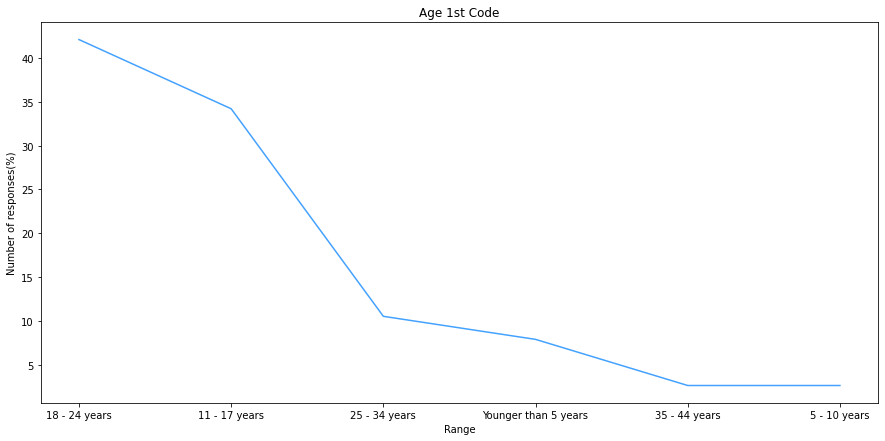

In [106]:
(cameroon_data.Age1stCode.value_counts(normalize=True)*100).plot(figsize=(15,7), color="#43a1ff")
plt.title('Age 1st Code')
plt.xlabel('Range')
plt.ylabel('Number of responses(%)')
plt.xticks(rotation=0)
plt.show()

We observe that most Cameroonians start coding between 18 & 24 years of age.

## Section 5: Analyzing Multi-answer Questions
Consider that we want to know the programming languages which Cameroonians use.

In [102]:
cmr_languages = cameroon_data['LanguageHaveWorkedWith']

cmr_languages

ResponseId
1106                                                                                        NaN
1767                                             HTML/CSS;JavaScript;Node.js;PHP;SQL;TypeScript
3299                                              C;C#;C++;HTML/CSS;Java;JavaScript;Node.js;SQL
17425                       C;C#;HTML/CSS;Java;JavaScript;Node.js;PHP;Python;SQL;TypeScript;VBA
19351    Bash/Shell;Dart;HTML/CSS;Java;JavaScript;Matlab;Node.js;PHP;Python;Ruby;SQL;TypeScript
27140                                                                       HTML/CSS;JavaScript
27357                                                                                      Java
29153                                      C;C++;HTML/CSS;JavaScript;Node.js;PHP;Python;SQL;VBA
32350                                                                            C#;Java;Kotlin
33200                   C;C++;Delphi;HTML/CSS;Java;JavaScript;Kotlin;Node.js;PHP;SQL;TypeScript
33943                        

We will use _.str.split(';')_ to split each row in the series into individual values for better analysis. We’re also going to add an extra argument, _expand=True_, to str.split(). This will create a new dataframe from our series by making each language its own column (each row still represents one respondent). You can read more about how this works [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html)

In [103]:
lang_lists = cmr_languages.str.split(';', expand=True)
lang_lists.head()

,0,1,2,3,4,5,6,7,8,9,10,11
ResponseId,,,,,,,,,,,,
1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1767,HTML/CSS,JavaScript,Node.js,PHP,SQL,TypeScript,None,None,None,None,None,None
3299,C,C#,C++,HTML/CSS,Java,JavaScript,Node.js,SQL,None,None,None,None
17425,C,C#,HTML/CSS,Java,JavaScript,Node.js,PHP,Python,SQL,TypeScript,VBA,None
19351,Bash/Shell,Dart,HTML/CSS,Java,JavaScript,Matlab,Node.js,PHP,Python,Ruby,SQL,TypeScript


 To be able to see the number of times each language was mentioned in total, we have to do a bit more work. There are a number of ways we could approach this problem, but here’s one:

1. Use df.stack() to stack this DataFrame, slicing each column and then stacking them on top of each other so that every data point in the DataFrame appears in a single pandas Series.

2. Use value_counts() on this new “stacked” series to get the total number of times each language is mentioned.

In [109]:
lang_lists.stack().value_counts(normalize=True)*100

HTML/CSS      12.145749
JavaScript    10.931174
PHP           10.121457
SQL           10.121457
Java           8.502024
C              6.882591
Python         6.477733
Node.js        5.263158
C++            4.453441
TypeScript     3.643725
C#             2.834008
Bash/Shell     2.429150
Matlab         2.024291
Kotlin         2.024291
Dart           2.024291
VBA            2.024291
R              1.619433
Assembly       1.214575
Go             0.809717
Rust           0.809717
Haskell        0.809717
PowerShell     0.809717
Ruby           0.404858
Delphi         0.404858
Perl           0.404858
APL            0.404858
Swift          0.404858
dtype: float64

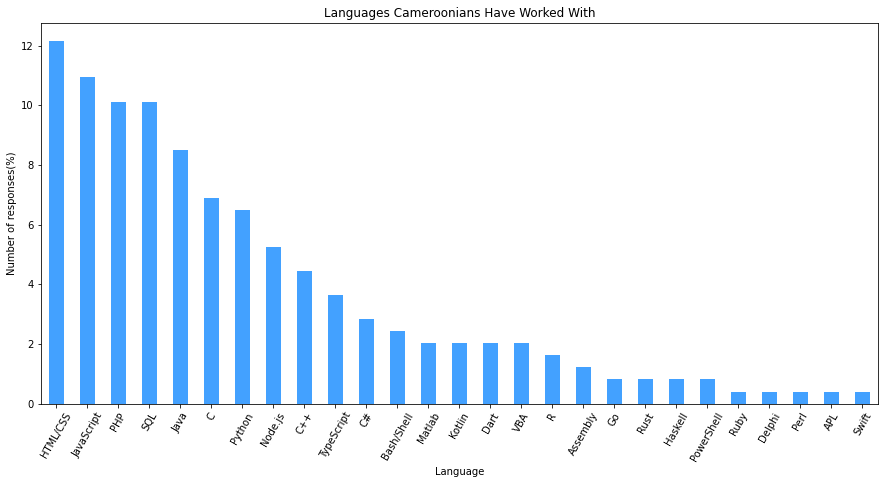

In [110]:
(lang_lists.stack().value_counts(normalize=True)*100).plot(kind='bar', figsize=(15,7), color="#43a1ff")
plt.title('Languages Cameroonians Have Worked With')
plt.xlabel('Language')
plt.ylabel('Number of responses(%)')
plt.xticks(rotation=60)
plt.show()

### Question: How Many Respondents Use Python and are Women?

In [148]:
gender_lang = data[['LanguageHaveWorkedWith', 'Gender']]

gender_lang.tail(20)

,LanguageHaveWorkedWith,Gender
ResponseId,,
83420,Groovy;HTML/CSS;Java;JavaScript;Node.js;PHP;PowerShell;TypeScript,Man
83421,Bash/Shell;C#;C++;Go;Groovy;HTML/CSS;Java;JavaScript;Kotlin;Node.js;PHP;Python;Scala;SQL;TypeScript,Man
83422,Bash/Shell;HTML/CSS;JavaScript;Node.js;Python;SQL;TypeScript,Woman
83423,HTML/CSS;JavaScript;PHP;Ruby,Man
83424,HTML/CSS;JavaScript;PHP;Python;SQL,Man
83425,Bash/Shell;C;Go;Java;JavaScript;Perl;SQL,Man
83426,HTML/CSS;JavaScript;Node.js;TypeScript,Man
83427,Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL,Man
83428,Java;Python,Man


In [162]:
rem_nan = gender_lang.dropna()
python_women = rem_nan[(rem_nan.LanguageHaveWorkedWith.str.contains('Python')) & (rem_nan.Gender == 'Woman')]

python_women.shape

(1842, 2)

We see that 1842 women use Python. Let us see the variation in the other languages which these women use.

In [165]:
language_list = python_women.LanguageHaveWorkedWith.str.split(';', expand=True).stack().value_counts(normalize=True)*100

language_list

Python         16.713547
JavaScript      9.790400
HTML/CSS        9.781327
SQL             8.737864
Java            6.959441
C++             5.108429
Bash/Shell      5.035841
Node.js         4.999546
C               4.473278
TypeScript      3.411669
C#              3.193903
PHP             3.112240
R               2.477089
Matlab          2.195808
PowerShell      1.733055
Assembly        1.388259
Go              1.324744
Kotlin          1.152346
Ruby            1.043462
Rust            0.907359
Dart            0.825696
VBA             0.698666
Haskell         0.589783
Swift           0.571636
Scala           0.544415
Perl            0.480900
Objective-C     0.408311
Groovy          0.408311
Julia           0.372017
LISP            0.254060
Elixir          0.217766
Clojure         0.199619
Delphi          0.190545
COBOL           0.172398
Erlang          0.163325
APL             0.145177
F#              0.127030
Crystal         0.090736
dtype: float64

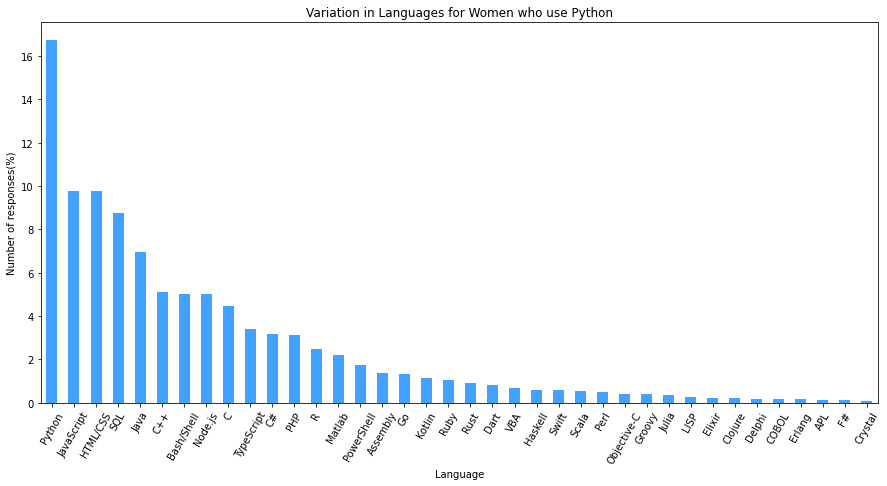

In [167]:
language_list.plot(kind='bar', figsize=(15,7), color="#43a1ff")
plt.title('Variation in Languages for Women who use Python')
plt.xlabel('Language')
plt.ylabel('Number of responses(%)')
plt.xticks(rotation=60)
plt.show()

The graph shows that Python is the main language for these women, and that most of them also work with JavaScript, HTML/CSS, SQL and Java, which is explicable, as the use cases may require them to use the afore-mentioned languages.

## Conclusion
In this notebook, we did some exploratory analysis of the Stackoverflow Survey data for 2021. We answered some questions using graphs, and statistical functions. There is always room for more analysis but we will end here for this exercise.